In [20]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv("corporate_rating.csv")

In [77]:
df["Sector"].value_counts()

Energy                   294
Basic Industries         260
Consumer Services        250
Technology               234
Capital Goods            233
Public Utilities         211
Health Care              171
Consumer Non-Durables    132
Consumer Durables         74
Transportation            63
Miscellaneous             57
Finance                   50
Name: Sector, dtype: int64

In [96]:
key={'D':0,'C':1,'CC':2,'CCC':3,'B':4,'BB':5,'BBB':6,'A':7,'AA':8,'AAA':9}

<AxesSubplot:>

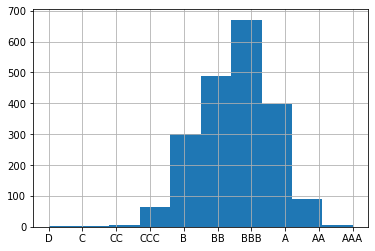

In [92]:
df["Rating"].sort_values(key=lambda x:x.map(key)).hist()

In [78]:
sectors = df["Sector"].unique()
for sector in sectors:
    freq = df[df["Sector"]==sector]["Rating"].value_counts().max()
    rating = df[df["Sector"]==sector]["Rating"].value_counts().idxmax()
    print(sector, rating, freq)

Consumer Durables BB 26
Energy BBB 96
Capital Goods BBB 89
Consumer Non-Durables A 53
Public Utilities BBB 93
Technology BB 77
Health Care BBB 56
Consumer Services BB 84
Miscellaneous BBB 24
Basic Industries BBB 99
Finance BBB 18
Transportation BBB 14


In [76]:
sector = "Consumer Durables"
df[df["Sector"]==sector]["Rating"].value_counts()

BB     26
BBB    26
B      11
A      11
Name: Rating, dtype: int64

In [98]:
df["RatingScore"] = df["Rating"].apply(lambda x:key[x])

<AxesSubplot:xlabel='returnOnCapitalEmployed', ylabel='RatingScore'>

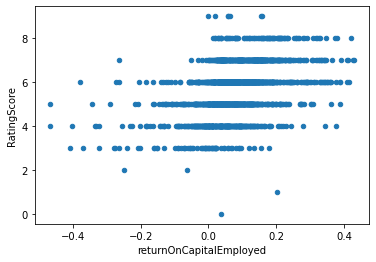

In [158]:
col = "returnOnCapitalEmployed"
cutoffSup = df[col].quantile(0.99)
cutoffInf = df[col].quantile(0.01)
d = df[(cutoffInf<=df[col]) & (df[col]<=cutoffSup)]
d = d[["RatingScore", col]]
d.plot.scatter(x=col, y="RatingScore")

<AxesSubplot:xlabel='debtRatio', ylabel='RatingScore'>

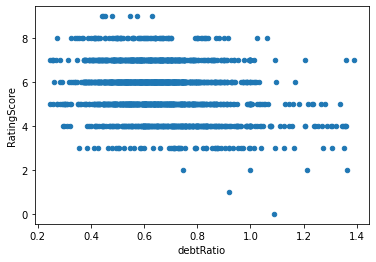

In [159]:
col = "debtRatio"
cutoffSup = df[col].quantile(0.99)
cutoffInf = df[col].quantile(0.01)
d = df[(cutoffInf<=df[col]) & (df[col]<=cutoffSup)]
d = d[["RatingScore", col]]
d.plot.scatter(x=col, y="RatingScore")

In [163]:
corr = df.corr()["RatingScore"]
corr

currentRatio                         -0.072976
quickRatio                           -0.029500
cashRatio                            -0.093891
daysOfSalesOutstanding               -0.018139
netProfitMargin                       0.038100
pretaxProfitMargin                    0.035899
grossProfitMargin                     0.025182
operatingProfitMargin                 0.031884
returnOnAssets                        0.071487
returnOnCapitalEmployed               0.072692
returnOnEquity                       -0.069528
assetTurnover                        -0.071954
fixedAssetTurnover                   -0.071064
debtEquityRatio                      -0.003957
debtRatio                            -0.254661
effectiveTaxRate                     -0.003505
freeCashFlowOperatingCashFlowRatio    0.056401
freeCashFlowPerShare                 -0.002372
cashPerShare                         -0.002162
companyEquityMultiplier              -0.004083
ebitPerRevenue                        0.035696
enterpriseVal

In [165]:
corr[abs(corr)>=0.05]

currentRatio                         -0.072976
cashRatio                            -0.093891
returnOnAssets                        0.071487
returnOnCapitalEmployed               0.072692
returnOnEquity                       -0.069528
assetTurnover                        -0.071954
fixedAssetTurnover                   -0.071064
debtRatio                            -0.254661
freeCashFlowOperatingCashFlowRatio    0.056401
enterpriseValueMultiple              -0.073071
payablesTurnover                      0.072533
RatingScore                           1.000000
Name: RatingScore, dtype: float64

In [8]:
sector = "Consumer Durables"
agency = "Egan-Jones Ratings Company"

df = df[(df["Sector"]==sector) & (df["Rating Agency Name"]==agency)]

In [9]:
df

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
290,BBB,Avery Dennison Corporation,AVY,Egan-Jones Ratings Company,8/5/2015,Consumer Durables,1.202466,0.809488,0.142070,55.243274,...,0.310922,0.604757,2.412580,3.574627,4.088326,0.057564,10.115124,3.989339,0.059113,5.865004
291,BBB,Avery Dennison Corporation,AVY,Egan-Jones Ratings Company,5/12/2014,Consumer Durables,1.345988,0.947687,0.226240,60.427117,...,0.327183,0.596376,1.940041,4.637195,3.089800,0.059137,13.055766,3.253049,0.052134,5.061608
404,A,ABB Ltd,ABB,Egan-Jones Ratings Company,8/5/2013,Consumer Durables,1.584708,0.372894,0.361079,0.000000,...,0.000000,0.995073,1.582499,2.707009,2.573295,0.097161,9.225518,1.590335,0.087292,5.840376
405,A,ABB Ltd,ABB,Egan-Jones Ratings Company,5/8/2015,Consumer Durables,1.603723,0.360719,0.349358,0.000000,...,0.000000,0.995579,1.673077,2.456294,2.758498,0.097816,7.122984,1.680507,0.096535,6.005247
406,A,ABB Ltd,ABB,Egan-Jones Ratings Company,8/12/2015,Consumer Durables,1.436506,0.299356,0.288122,0.000000,...,0.000000,0.770561,1.321653,2.130728,2.855880,0.080043,8.755714,1.715184,0.107607,5.837632
567,A,Kimberly-Clark Corporation,KMB,Egan-Jones Ratings Company,7/23/2013,Consumer Durables,1.120041,0.680746,0.180233,43.916651,...,0.315450,0.686513,5.434896,3.739583,3.896005,0.139230,10.959499,7.916667,0.143722,5.354888
568,A,Kimberly-Clark Corporation,KMB,Egan-Jones Ratings Company,10/28/2015,Consumer Durables,0.854623,0.495669,0.097496,44.783228,...,0.313109,0.542064,3.435954,2.380429,-85.298851,0.071809,22.838150,6.338648,0.124039,4.581547
570,A,Kimberly-Clark Corporation,KMB,Egan-Jones Ratings Company,10/22/2014,Consumer Durables,0.892869,0.525056,0.126727,41.137447,...,0.379601,0.634798,4.822430,2.793057,21.297668,0.114328,13.774171,7.596796,0.144241,4.985092


In [10]:
df.columns

Index(['Rating', 'Name', 'Symbol', 'Rating Agency Name', 'Date', 'Sector',
       'currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
       'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed',
       'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover',
       'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
       'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
       'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue',
       'enterpriseValueMultiple', 'operatingCashFlowPerShare',
       'operatingCashFlowSalesRatio', 'payablesTurnover'],
      dtype='object')

In [23]:
variables = ['currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
       'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed',
       'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover',
       'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
       'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
       'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue',
       'enterpriseValueMultiple', 'operatingCashFlowPerShare',
       'operatingCashFlowSalesRatio', 'payablesTurnover']

X = df[variables].values
Y = df['Rating'].values

In [29]:
N = len(Y)
r = 0.8
n = int(N*r)
X_train, X_test = X[:n,:], X[n:,:]
Y_train, Y_test = Y[:n], Y[n:]

array([[ 1.74516329,  0.79564567,  0.25870447, 32.77858298,  0.04999652,
         0.06821081,  0.14756353,  0.08741497,  0.05582909,  0.09366061,
         0.25973919,  1.11665957,  3.31578632,  3.65239836,  0.7850571 ,
         0.27397504,  0.70591808,  3.85297413,  2.49732312,  4.65239836,
         0.06821081,  6.08649623,  5.45810378,  0.09456743,  8.97600173],
       [ 1.74224828,  0.80251805,  0.33494392, 28.99367809,  0.04662597,
         0.07274215,  0.15333901,  0.09224754,  0.05520436,  0.1078109 ,
         0.25690465,  1.18398305,  3.67776983,  3.65370248,  0.78511733,
         0.35902401,  0.59294526,  3.22516003,  3.50945984,  4.65370248,
         0.07274215,  5.86005967,  5.43922051,  0.08819185,  7.81297696],
       [ 1.33799361,  0.48768518,  0.12793566, 27.2531231 ,  0.04580614,
         0.06718596,  0.14721846,  0.08496665,  0.05400261,  0.10486816,
         0.26973923,  1.17893813,  3.34446475,  3.99492947,  0.79979697,
         0.31821849,  0.29249328,  1.60770882,  1

In [36]:
Y_test

array(['BB', 'BB', 'BB', 'BBB', 'BBB', 'BBB'], dtype=object)